<a href="https://colab.research.google.com/github/Fuenfgeld/DMA2023TeamB/blob/main/Auswertung_DWH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Zweck**: Exploratory Data Analysis (EDA) und Testen der Hypothesen im DWH



Für die Analyse erfolgt zunächst der Import der erforderlichen Packages:

In [1]:
import pandas_profiling

In [4]:
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
%matplotlib inline

In [5]:
from google.colab import drive
# Mounten des Drives für Data Warehouse Zugang
drive.mount("/content/drive")

Mounted at /content/drive


In [6]:
# Pfad des DWH
DB_DWH_PATH = "/content/drive/Shareddrives/DMA_2023_D/DMA2023TeamB/source_dbs/DWH_covid19.db"

# Verbindung zum DWH
dwh_conn = sqlite3.connect(DB_DWH_PATH)

In [7]:
# Liste der Tabellen im DWH
if dwh_conn is not None:
  dwh_cursor = dwh_conn.cursor()
  dwh_cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
  print("List of Tables", dwh_cursor.fetchall())


List of Tables [('d_conditions',), ('d_devices',), ('d_medications',), ('d_procedures',), ('d_patients',), ('F_ANTICOVIS',)]


In [8]:
# Einlesen der Query Resultate in ein Pandas Dataframe
df_faktentabelle = pd.read_sql_query("SELECT * FROM F_ANTICOVIS", dwh_conn)

In [9]:
# .head() zum Überblicken der ersten Resultate
df_faktentabelle.head()

,patients_ID,conditions_code,procedures_code,devices_code,medications_code,medication_grading,course_of_Desease
0,2f114e21-8b95-e9eb-2e9e-4b950b059cfa,36955009.0,261352009.0,0.0,0.0,0,1
1,2f114e21-8b95-e9eb-2e9e-4b950b059cfa,386661006.0,261352009.0,0.0,0.0,0,1
2,2f114e21-8b95-e9eb-2e9e-4b950b059cfa,840539006.0,261352009.0,0.0,0.0,0,1
3,2f114e21-8b95-e9eb-2e9e-4b950b059cfa,840544004.0,261352009.0,0.0,0.0,0,1
4,2812f4fc-6aba-0033-728b-7e569bb8adcc,36955009.0,180325003.0,0.0,197604.0,0,5


In [10]:
# .shape returns the number of rows by the number of columns
#size of dataset
df_faktentabelle.shape

(608791, 7)

In [11]:
# .columns zeigt die Namen aller Tabellen im DWH
df_faktentabelle.columns

Index(['patients_ID', 'conditions_code', 'procedures_code', 'devices_code',
       'medications_code', 'medication_grading', 'course_of_Desease'],
      dtype='object')

In [12]:
# Anzeigen aller Attributinformationen
df_faktentabelle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608791 entries, 0 to 608790
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   patients_ID         608791 non-null  object 
 1   conditions_code     608791 non-null  float64
 2   procedures_code     608791 non-null  float64
 3   devices_code        608791 non-null  float64
 4   medications_code    608791 non-null  float64
 5   medication_grading  608791 non-null  object 
 6   course_of_Desease   608791 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 32.5+ MB


In [ ]:
#Beenden der DWH-Verbindung
dwh_conn.close()

In [13]:
# .nunique(axis=0) zeigt die Anzahl einzigartiger Variablen 
df_faktentabelle.nunique(axis=0)


patients_ID           1050
conditions_code         42
procedures_code         18
devices_code             7
medications_code        30
medication_grading       4
course_of_Desease        6
dtype: int64

In [28]:
#df_patients = pd.read_sql_query("SELECT * FROM d_patients", dwh_conn)

Die Verteilung des Datensets ist gleichmäßig zwischen männlcihen und weiblichen Patient:innen

In [14]:
!pip install pandasql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26787 sha256=564889bc941ba955aa1206357d841085dfc26a43289c2aa135a6c611f074b74d
  Stored in directory: /root/.cache/pip/wheels/ed/8f/46/a383923333728744f01ba24adbd8e364f2cb9470a8b8e5b9ff
Successfully built pandasql


In einem nächsten Schritt werden nun alle Patienten betrachtet, die Covid haben. 



In [40]:
from pandasql import sqldf

all_patients_that_had_covid = sqldf("""SELECT DISTINCT patients_id, conditions_code As Patients_With_Covid
                                                  FROM df_faktentabelle 
                                                  WHERE conditions_code = 840539006""")
all_patients_that_had_covid

,patients_ID,Patients_With_Covid
0,2f114e21-8b95-e9eb-2e9e-4b950b059cfa,840539006.0
1,2812f4fc-6aba-0033-728b-7e569bb8adcc,840539006.0
2,52a250a9-24e4-ec9b-91d6-c38cf1b10fc0,840539006.0
3,ad5525c0-fdab-94dc-018f-d7209c72bdef,840539006.0
4,7f30313f-98e9-2cc2-68a5-6f9973f9ad5a,840539006.0
...,...,...
860,75b6b10f-c734-8d73-fc30-cb2bf4ddddd0,840539006.0
861,179a1be3-2be7-a60d-2e02-d35e63b585d4,840539006.0
862,edab2899-dac4-a19d-59e2-a9bea7b95cab,840539006.0
863,4c523ab1-3255-911a-7eef-3bc3e48b7b05,840539006.0


Nun schauen wir uns die Patient:innen an, die keine Behandlung mit Antikoagulantien  erhalten haben. 

In [41]:
all_COVID_19_Patients_That_did_not_Recieved_an_anticoagulation = sqldf("""SELECT DISTINCT patients_id As Patients_With_Covid 
                                                                  FROM df_faktentabelle 
                                                                  WHERE conditions_code = 840539006 AND medications_code = 0""")
all_COVID_19_Patients_That_did_not_Recieved_an_anticoagulation

,Patients_With_Covid
0,2f114e21-8b95-e9eb-2e9e-4b950b059cfa
1,52a250a9-24e4-ec9b-91d6-c38cf1b10fc0
2,7f30313f-98e9-2cc2-68a5-6f9973f9ad5a
3,b9f7feb0-45ac-55ed-4ee2-be12ad599416
4,2b2d8855-c163-3838-a719-995a3cefca33
...,...
678,34adbb99-9f87-5259-a8ee-4aec2a0d170b
679,b0a0046b-7664-5d33-5a1a-9a26fcf5bfb5
680,75b6b10f-c734-8d73-fc30-cb2bf4ddddd0
681,179a1be3-2be7-a60d-2e02-d35e63b585d4


Als nächstes werden Patient:innen betrachtet, welche eine Behandlung mit Antikoagulantien erhalten haben. 

In [42]:
all_COVID_19_Patients_That_Recieved_an_anticoagulation = sqldf("""SELECT DISTINCT patients_id As Patients_With_Covid 
                                                                  FROM df_faktentabelle 
                                                                  WHERE conditions_code = 840539006 AND medications_code != 0""")

all_COVID_19_Patients_That_Recieved_an_anticoagulation

,Patients_With_Covid
0,2812f4fc-6aba-0033-728b-7e569bb8adcc
1,ad5525c0-fdab-94dc-018f-d7209c72bdef
2,21e040b3-3c29-6042-1dba-da47dee67c18
3,b7f0aa3e-0678-7d03-ee5a-74da32590ac4
4,f06be4a3-a0cc-8dfe-0a7f-1d937ce621ec
...,...
177,50a6d2a0-f8f0-4dd1-4c61-2e5d7083bf80
178,6008a677-9edd-5ffc-699f-c32a109ffabd
179,e476b396-89eb-06ed-1175-d660f5a4f19f
180,4c523ab1-3255-911a-7eef-3bc3e48b7b05


Der nachfolgende Graph zeigt die Verteilung der Schweregrade der einzelnen Patient:innen an: 

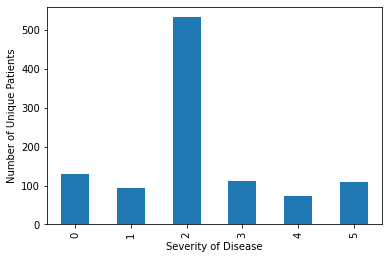

,patients_ID,course
0,0033cec2-67d3-39ec-b0f4-29f91a2918d6,2
1,00680fcd-0ef2-99c5-f69d-59463206750f,5
2,00f4a426-4746-6513-1775-1e8650e2f6b5,2
3,00f8ffa0-e135-059c-32e9-54a79b5f612e,2
4,00ff2a47-af82-8681-cb1d-428471df02f0,4
...,...,...
1045,ff2d586c-f770-a795-c9eb-0b0d39447e48,2
1046,ff9e749b-0abc-22f8-0d62-6912b87781b1,2
1047,ffd905f3-45fb-b2a7-7429-bf864ef29d81,5
1048,ffda75ec-2d20-a3e4-72be-daafce1bc478,0


In [43]:
import matplotlib.pyplot as plt

# Sort the values from 0 to 6
distinct_patients_and_course_of_desease = sqldf("""SELECT patients_id, max(course_of_desease)as course FROM df_faktentabelle
GROUP BY patients_id""")

distinct_patients_and_course_of_desease['course'].value_counts().sort_index().plot(kind='bar')

 # Add labels to the x and y axis
plt.xlabel('Schweregrad der Erkrankung')
plt.ylabel('Anzahl Patient:innen')

# # Show the plot
plt.show()
distinct_patients_and_course_of_desease

Im Nachfolgenden betrachten wir Patient:innen, sowie deren Medikationsgrading.

In [44]:
distinct_patients_and_medications_grading = sqldf("""SELECT patients_id, max(medication_grading)as antikagulation FROM df_faktentabelle
GROUP BY patients_id""")
distinct_patients_and_medications_grading

,patients_ID,antikagulation
0,0033cec2-67d3-39ec-b0f4-29f91a2918d6,0
1,00680fcd-0ef2-99c5-f69d-59463206750f,1
2,00f4a426-4746-6513-1775-1e8650e2f6b5,0
3,00f8ffa0-e135-059c-32e9-54a79b5f612e,0
4,00ff2a47-af82-8681-cb1d-428471df02f0,1
...,...,...
1045,ff2d586c-f770-a795-c9eb-0b0d39447e48,0
1046,ff9e749b-0abc-22f8-0d62-6912b87781b1,0
1047,ffd905f3-45fb-b2a7-7429-bf864ef29d81,3
1048,ffda75ec-2d20-a3e4-72be-daafce1bc478,0


Nun betrachten wir Patient:innen und deren Covid Status: 

In [45]:
from sqlalchemy.sql.expression import distinct
df_faktentabelle ['covid']= 0
df_faktentabelle
for i, row in df_faktentabelle.iterrows():
  if row.conditions_code == 840539006:
    df_faktentabelle.at[i, 'covid'] = 1
df_faktentabelle


,patients_ID,conditions_code,procedures_code,devices_code,medications_code,medication_grading,course_of_Desease,covid
0,2f114e21-8b95-e9eb-2e9e-4b950b059cfa,36955009.0,261352009.0,0.0,0.0,0,1,0
1,2f114e21-8b95-e9eb-2e9e-4b950b059cfa,386661006.0,261352009.0,0.0,0.0,0,1,0
2,2f114e21-8b95-e9eb-2e9e-4b950b059cfa,840539006.0,261352009.0,0.0,0.0,0,1,1
3,2f114e21-8b95-e9eb-2e9e-4b950b059cfa,840544004.0,261352009.0,0.0,0.0,0,1,0
4,2812f4fc-6aba-0033-728b-7e569bb8adcc,36955009.0,180325003.0,0.0,197604.0,0,5,0
...,...,...,...,...,...,...,...,...
608786,fce5ed5c-e218-4839-a0c5-6ef906e5ae73,230690007.0,180325003.0,0.0,855332.0,3,5,0
608787,fce5ed5c-e218-4839-a0c5-6ef906e5ae73,230690007.0,180325003.0,0.0,897718.0,0,5,0
608788,fce5ed5c-e218-4839-a0c5-6ef906e5ae73,230690007.0,180325003.0,0.0,197604.0,0,5,0
608789,fce5ed5c-e218-4839-a0c5-6ef906e5ae73,230690007.0,180325003.0,0.0,855332.0,3,5,0


Daraus erhalten wir eine Tabelle, welche einzigartige Patient:innen und deren Covid Status erhalten: 

In [46]:
distinct_patients_and_covid_status = sqldf("""SELECT patients_id, max(covid) AS covid FROM df_faktentabelle
 GROUP BY patients_id""")
distinct_patients_and_covid_status

,patients_ID,covid
0,0033cec2-67d3-39ec-b0f4-29f91a2918d6,1
1,00680fcd-0ef2-99c5-f69d-59463206750f,1
2,00f4a426-4746-6513-1775-1e8650e2f6b5,1
3,00f8ffa0-e135-059c-32e9-54a79b5f612e,1
4,00ff2a47-af82-8681-cb1d-428471df02f0,1
...,...,...
1045,ff2d586c-f770-a795-c9eb-0b0d39447e48,1
1046,ff9e749b-0abc-22f8-0d62-6912b87781b1,1
1047,ffd905f3-45fb-b2a7-7429-bf864ef29d81,1
1048,ffda75ec-2d20-a3e4-72be-daafce1bc478,0


Zusammenfassung der Dtaen von Patient:innen, Medication Grading, Schweregrad der Erkrankung und Covid Status:  

In [47]:
PMG = pd.merge(distinct_patients_and_course_of_desease,distinct_patients_and_medications_grading, on = "patients_ID" )
PMG["patients"]=PMG.index
PMG = pd.merge (PMG, distinct_patients_and_covid_status, on = 'patients_ID')
PMG

,patients_ID,course,antikagulation,patients,covid
0,0033cec2-67d3-39ec-b0f4-29f91a2918d6,2,0,0,1
1,00680fcd-0ef2-99c5-f69d-59463206750f,5,1,1,1
2,00f4a426-4746-6513-1775-1e8650e2f6b5,2,0,2,1
3,00f8ffa0-e135-059c-32e9-54a79b5f612e,2,0,3,1
4,00ff2a47-af82-8681-cb1d-428471df02f0,4,1,4,1
...,...,...,...,...,...
1045,ff2d586c-f770-a795-c9eb-0b0d39447e48,2,0,1045,1
1046,ff9e749b-0abc-22f8-0d62-6912b87781b1,2,0,1046,1
1047,ffd905f3-45fb-b2a7-7429-bf864ef29d81,5,3,1047,1
1048,ffda75ec-2d20-a3e4-72be-daafce1bc478,0,0,1048,0


Nun wollen wir die Demographie dieses Datensets betrachten: 

Die nachfolgende Tabelle zeigt die behandelten Patient:innen an: 

In [48]:
covid_treated = sqldf("""SELECT * FROM PMG where covid = 1 and antikagulation > 0 """)
covid_treated

,patients_ID,course,antikagulation,patients,covid
0,00680fcd-0ef2-99c5-f69d-59463206750f,5,1,1,1
1,00ff2a47-af82-8681-cb1d-428471df02f0,4,1,4,1
2,02b3eaaa-eaca-9497-b7fd-0f5eac551b95,4,1,9,1
3,03969e0b-c3f4-d792-026f-7dbbfbd36192,5,1,14,1
4,08d17744-57ec-4543-630c-65714c52505d,4,2,36,1
...,...,...,...,...,...
171,f3b0e643-97e4-a25e-1837-827ae4a10c8b,5,1,995,1
172,f9c42e80-74f4-f5d0-342d-cf99088d3258,4,1,1015,1
173,fbce2455-d555-b14d-3284-2864c798c845,3,2,1024,1
174,fe611f03-fd75-3047-b9e6-e673046706b5,4,1,1039,1


Die nachfolgende Tabelle zeigt die unbehandelten Patient:innen an: 

In [ ]:
covid_untreated = sqldf("""SELECT * FROM PMG where covid = 1 and antikagulation = 0 """)
covid_untreated

,patients_ID,course,antikagulation,patients,covid
0,0033cec2-67d3-39ec-b0f4-29f91a2918d6,2,0,0,1
1,00f4a426-4746-6513-1775-1e8650e2f6b5,2,0,2,1
2,00f8ffa0-e135-059c-32e9-54a79b5f612e,2,0,3,1
3,011f440b-afab-8c21-fd79-f9bcd0e75a09,2,0,5,1
4,01ce9263-4d31-4cf2-2f6d-20ac8b4887e4,2,0,6,1
...,...,...,...,...,...
684,fee41408-8da4-7b88-f6ea-26184d86486f,2,0,1042,1
685,fee4b67a-756f-6061-3dd2-2dc05994873b,2,0,1043,1
686,ff1a2c6d-6ae4-1737-ff36-4e76782efe6c,2,0,1044,1
687,ff2d586c-f770-a795-c9eb-0b0d39447e48,2,0,1045,1


In [50]:
df_patients = pd.read_sql_query("SELECT * FROM d_patients", dwh_conn)

In [61]:
demographie = pd.merge(PMG, df_patients[['PATIENTS_ID', 'PATIENTS_GENDER', 'PATIENTS_DEATHDATE', 'PATIENTS_BIRTHDATE']], left_on='patients_ID', right_on='PATIENTS_ID')

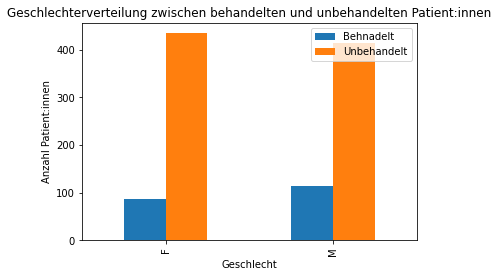

In [62]:
import matplotlib.pyplot as plt
demographie['antikagulation'] = demographie['antikagulation'].astype(int)

# group by gender and count the number of patients for treated COVID patients
treated_counts = demographie[demographie['antikagulation'] > 0].groupby('PATIENTS_GENDER')['PATIENTS_GENDER'].count()

# group by gender and count the number of patients for untreated COVID patients
untreated_counts = demographie[demographie['antikagulation'] == 0].groupby('PATIENTS_GENDER')['PATIENTS_GENDER'].count()

# combine the two counts into a single DataFrame
gender_counts = pd.concat([treated_counts, untreated_counts], axis=1, keys=['Behnadelt', 'Unbehandelt'])

# create a bar plot of gender counts
gender_counts.plot(kind='bar')

# set the title and axis labels
plt.title('Geschlechterverteilung zwischen behandelten und unbehandelten Patient:innen')
plt.xlabel('Geschlecht')
plt.ylabel('Anzahl Patient:innen')

# display the plot
plt.show()

Die Geschlechterverteilung zwischen behandelten und unbehandelten Patient:innen ist ähnlich. 

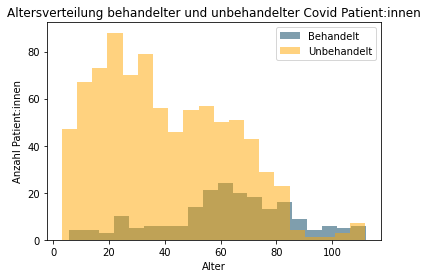

In [85]:
import matplotlib.pyplot as plt

# create a histogram of age for treated COVID patients
plt.hist(demographie[demographie['antikagulation'] > 0]['age'], bins=20, alpha=0.5, color='#003f5c', label='Behandelt')

# create a histogram of age for untreated COVID patients
plt.hist(demographie[demographie['antikagulation'] == 0]['age'], bins=20, alpha=0.5, color='#ffa600', label='Unbehandelt')

# set the axis labels and title
plt.xlabel('Alter')
plt.ylabel('Anzahl Patient:innen')
plt.title('Altersverteilung behandelter und unbehandelter Covid Patient:innen')

# add legend
plt.legend()

# show the plot
plt.show()

In [70]:
from scipy.stats import ttest_ind

# extract age for treated and untreated patients
age_treated = demographie[demographie['antikagulation'] > 0]['age']
age_untreated = demographie[demographie['antikagulation'] == 0]['age']

# perform t-test
t_stat, p_val = ttest_ind(age_treated, age_untreated, equal_var=False)

print('T-test results:')
print(f't-statistic: {t_stat:.2f}')
print(f'p-value: {p_val:.3f}')

T-test results:
t-statistic: 12.40
p-value: 0.000


Die Altersverteilung zwischen behandelten und unbehandelten Patient:innen ist unterschiedlich. Da jedoch die Anzahl der behandelten Patient:innen deutlich geringer ist, wird dies in der Analyse vernachlässigt. 

In [ ]:
Im Nachfolgenden wird der Unterschied der Schweregrade zwischen behandelten und unbehandelten Patient:innen untersucht. 
Die Hypothese lautet: Patient:innen mit Antikoagulation weisen im Vergleich zu nicht-antikoagulierten Patient:innen einen leichteren klinischen Covid 19-Erkrankungsverlauf auf.

In [ ]:
# Calculate the average severity for treated patients
avg_severity_in_patients_with_antikoagulation = covid_treated ['course'].mean()

## Calculate the average severity for untreated patients
avg_severity_in_patients_without_antikoagulation = covid_untreated ['course'].mean()

##Compare the average severity between treated and untreated patients
if avg_severity_in_patients_with_antikoagulation < avg_severity_in_patients_without_antikoagulation:
    print("The average severity of disease is lower in treated patients compared to untreated patients.")
elif avg_severity_in_patients_with_antikoagulation > avg_severity_in_patients_without_antikoagulation:
    print("The average severity of disease is higher in treated patients compared to untreated patients.")
else:
    print("The average severity of disease is the same in treated and untreated patients.")

The average severity of disease is higher in treated patients compared to untreated patients.


In [ ]:
import scipy.stats as stats

# Calculate the t-statistic and p-value
t_statistic, p_value = stats.ttest_ind(covid_treated ['course'], covid_untreated ['course'], equal_var=False)

# Check if the p-value is less than 0.05
if p_value < 0.05:
    print("The difference in average severity between treated and untreated patients is statistically significant, the p-value is", p_value)
else:
    print("The difference in average severity between treated and untreated patients is not statistically significant, the p-value is", p_value)

The difference in average severity between treated and untreated patients is statistically significant, the p-value is 5.6266415502645845e-78


Daraus ergibt sich, dass der Schweregrad der Erkrankung bei Patient:innen signifikant höher ist, welche mit Antikoagulantien behandelt worden sind. Hypothese 1 kann somit widerlegt werden. 

Der nachfolgende Graph stellt eine Heatmap dar, welche die Patient:innen und den Schweregrad der Erkrankung abhängig von der Behandlung anzeigt. 

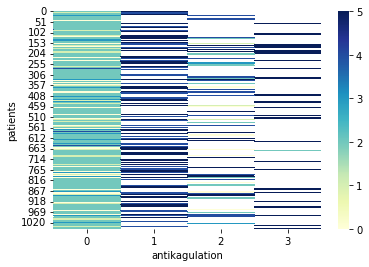

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df_data = sqldf("""SELECT patients, antikagulation, course FROM PMG """)

# Create a pivot table
df_pivot = df_data.pivot('patients','antikagulation','course',)

# Create a heatmap
sns.heatmap(df_pivot, cmap='YlGnBu')

# Show the plot
plt.show()

In diesem Abschnitt wird Hypothese 2 untersucht: Heparinderivate sind mit einem besseren klinischen Covid-19-Verlauf als andere Antikoagulantien assoziiert.

In [71]:
covid_treated_heparin = sqldf("""SELECT * FROM PMG where covid = 1 and antikagulation = 1 """)
covid_treated_heparin

,patients_ID,course,antikagulation,patients,covid
0,00680fcd-0ef2-99c5-f69d-59463206750f,5,1,1,1
1,00ff2a47-af82-8681-cb1d-428471df02f0,4,1,4,1
2,02b3eaaa-eaca-9497-b7fd-0f5eac551b95,4,1,9,1
3,03969e0b-c3f4-d792-026f-7dbbfbd36192,5,1,14,1
4,0d592ae5-a3e8-7546-084a-a7ef543d85eb,5,1,57,1
...,...,...,...,...,...
102,f06be4a3-a0cc-8dfe-0a7f-1d937ce621ec,5,1,981,1
103,f0ccab99-7054-29cc-bb71-c15304d03e9a,4,1,984,1
104,f3b0e643-97e4-a25e-1837-827ae4a10c8b,5,1,995,1
105,f9c42e80-74f4-f5d0-342d-cf99088d3258,4,1,1015,1


In [76]:
covid_treated_nonheparin = sqldf("""SELECT * FROM PMG where covid = 1 and antikagulation > 1 """)
covid_treated_nonheparin 

,patients_ID,course,antikagulation,patients,covid
0,08d17744-57ec-4543-630c-65714c52505d,4,2,36,1
1,0d9b1502-a393-9fa6-afcc-b48b40c9c854,5,3,58,1
2,1899ff34-df24-afba-adc7-5839e88f963f,5,3,105,1
3,19a0514e-c326-42ef-a755-dffa515df7d2,5,3,111,1
4,1cc177c6-8da7-f9df-9e5e-881bec2b8f4e,2,2,130,1
...,...,...,...,...,...
64,efb13f8d-708c-0a77-aa20-983204043ee8,4,2,980,1
65,f1a78e83-5975-82f3-0662-8d32cf7c8eb7,5,3,985,1
66,f26d31f0-4091-3112-acee-310a8e68351c,4,2,988,1
67,fbce2455-d555-b14d-3284-2864c798c845,3,2,1024,1


In [81]:
## Calculate the average severity for patients with heparin treatment
avg_severity_in_patients_with_heparin = covid_treated_heparin['course'].mean()

## Calculate the average severity for patients without heparin treatment
avg_severity_in_patients_without_heparin = covid_treated_nonheparin ['course'].mean()

## Compare the average severity between patients with and without heparin treatment
if avg_severity_in_patients_with_heparin < avg_severity_in_patients_without_heparin:
    print("The average severity of disease is lower in patients with heparin treatment compared to patients without heparin treatment.")
elif avg_severity_in_patients_with_heparin > avg_severity_in_patients_without_heparin:
    print("The average severity of disease is higher in patients with heparin treatment compared to patients without heparin treatment.")
else:
    print("The average severity of disease is the same in patients with heparin treatment and patients without heparin treatment.")


The average severity of disease is higher in patients with heparin treatment compared to patients without heparin treatment.


In [83]:
import scipy.stats as stats

# Calculate the t-statistic and p-value
t_statistic, p_value = stats.ttest_ind(covid_treated_heparin ['course'], covid_treated_nonheparin ['course'], equal_var=False)

# Check if the p-value is less than 0.05
if p_value < 0.05:
    print("The difference in average severity between heparin treated and non-heparin treated patients is statistically significant, the p-value is", p_value)
else:
    print("The difference in average severity between heparin treated and non-heparin treated patients is not statistically significant, the p-value is", p_value)

The difference in average severity between heparin treated and non-heparin treated patients is statistically significant, the p-value is 0.001829347178781694


Daraus ergibt sich, dass der Schweregrad der Erkrankung bei Patient:innen, welche mit Heparinderivaten behandelt worden sind, signifikant höher ist, als der Patient:innen, welche mit anderen Antikoagulantien behandelt worden sind. Hypothese 2 kann somit widerlegt werden. 